✅ Библиотеки установлены!


/tmp/ipykernel_3734/3062849196.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


=== АНАЛИЗ ДАННЫХ ФИТНЕС-ТРЕКЕРА ===
Всего записей в выборке: 500
Диапазон времени: 2026-01-13 13:48:17.131266 - 2026-01-13 13:56:40.411268

Последние 5 записей:
                   timestamp  steps  heart_rate activity_type  calories
0 2026-01-13 13:56:40.411268     40          92       walking  2.561568
1 2026-01-13 13:56:39.399272    100         158       running  6.767114
2 2026-01-13 13:56:38.387925      0         105       cycling  6.410228
3 2026-01-13 13:56:37.376673      0         140       cycling  6.652947
4 2026-01-13 13:56:36.365381      0          70          rest  0.647437

=== ОСНОВНАЯ СТАТИСТИКА ===
            steps  heart_rate    calories
count  500.000000  500.000000  500.000000
mean    33.188000  105.180000    4.597206
std     42.000008   30.025834    2.973875
min      0.000000   60.000000    0.503141
25%      0.000000   75.000000    0.978105
50%      0.000000  103.000000    5.177620
75%     60.000000  132.000000    7.046196
max    120.000000  160.000000    9.980950

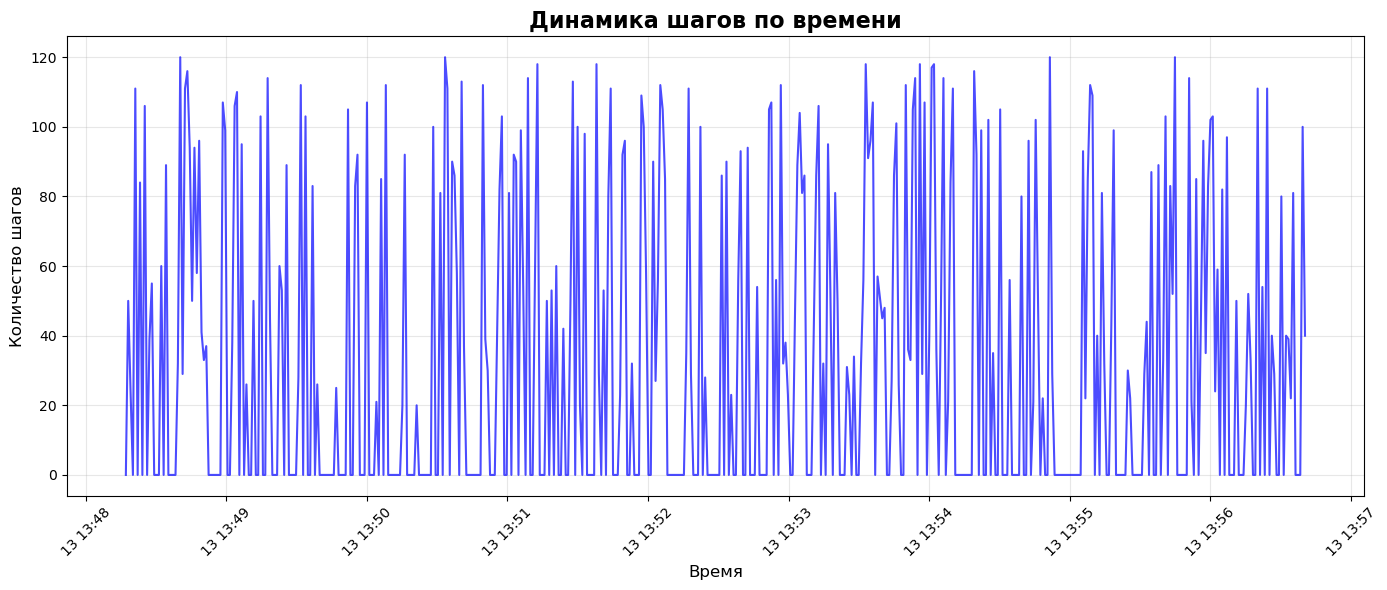

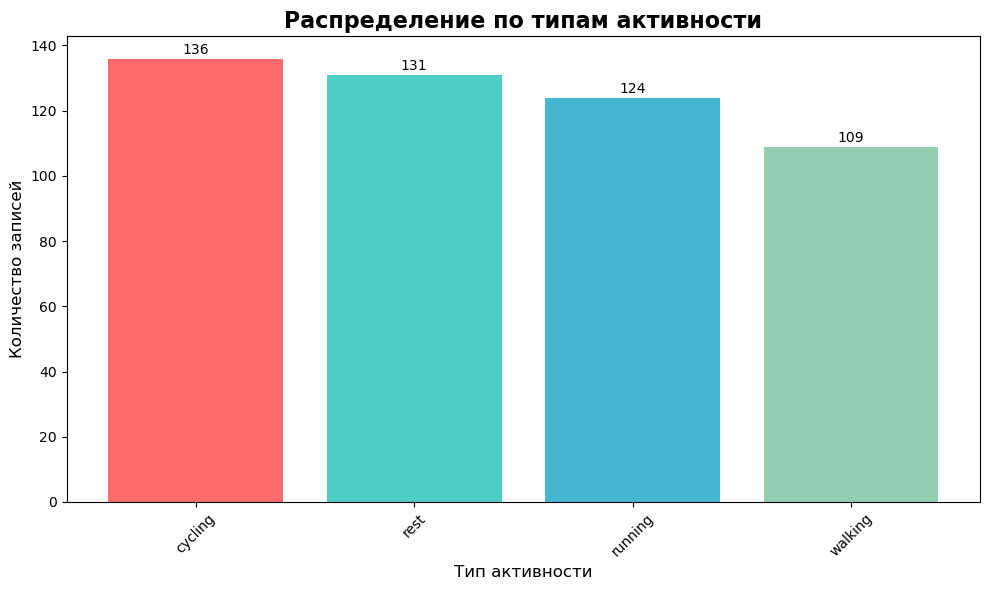

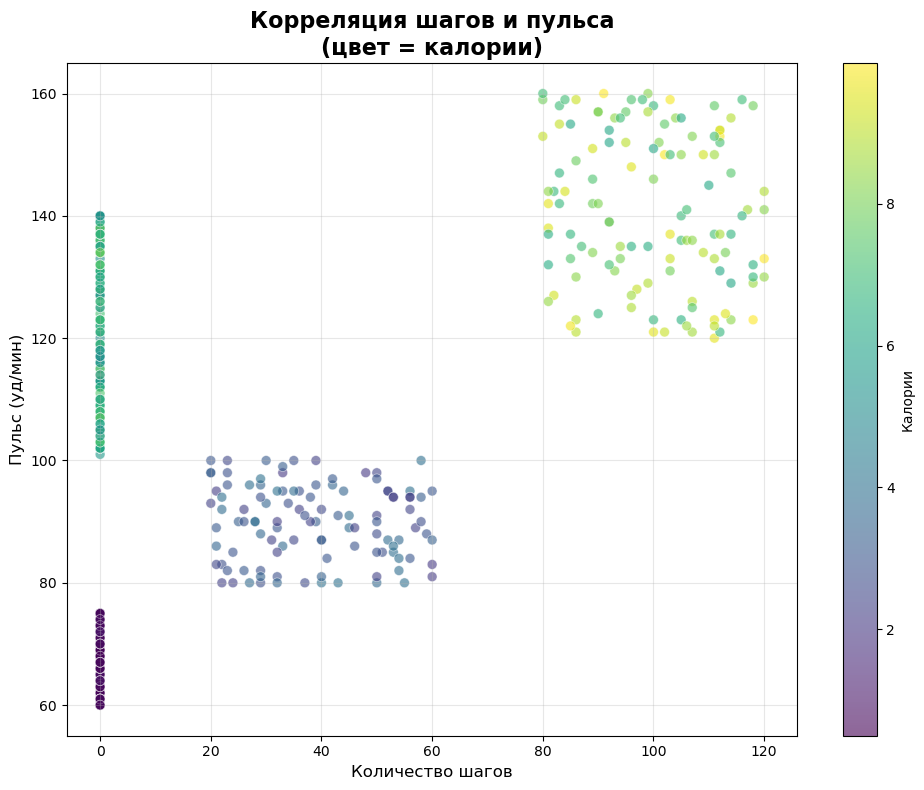

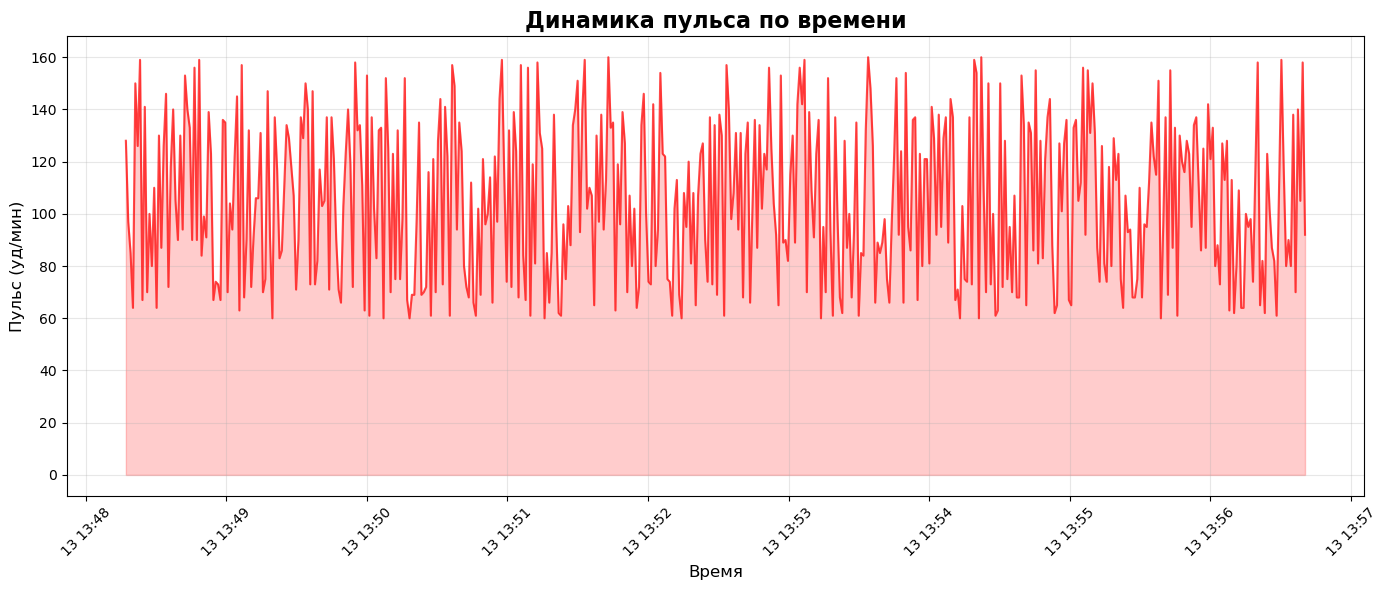

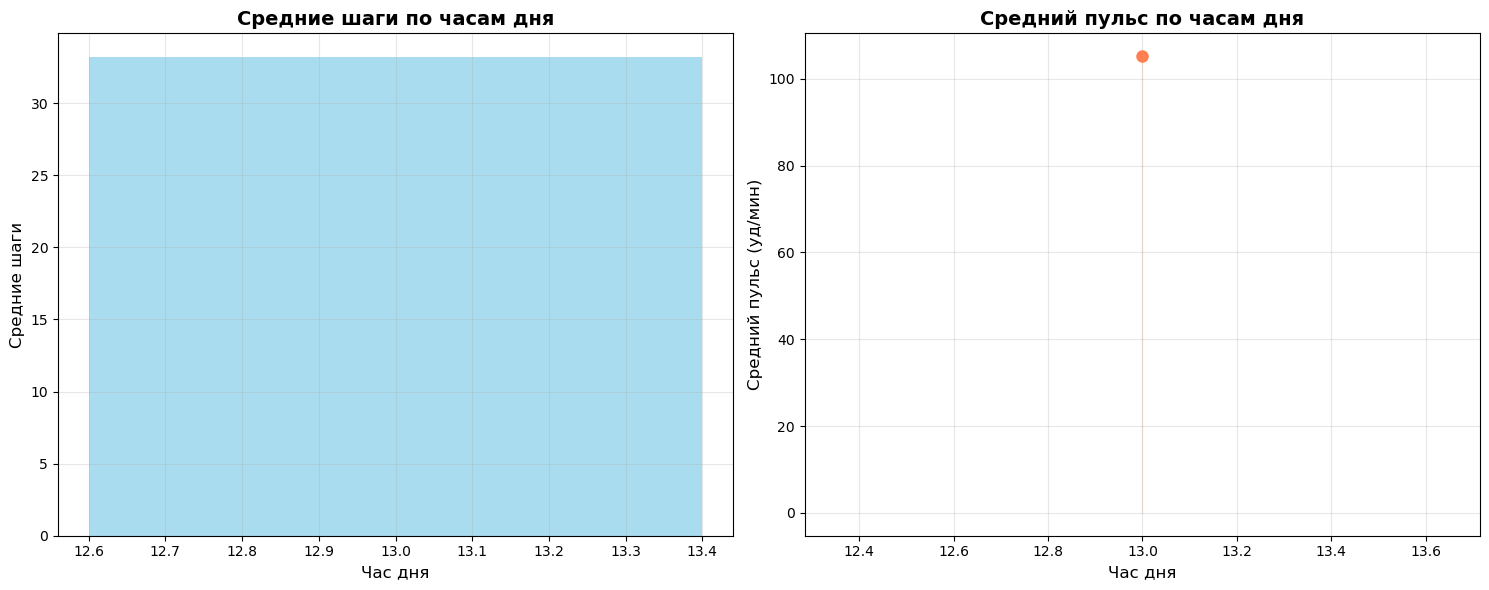


=== ТОП-10 САМЫХ АКТИВНЫХ ЗАПИСЕЙ ===
                 timestamp  steps  heart_rate activity_type  calories
2026-01-13 13:55:44.894168    120         133       running  9.962238
2026-01-13 13:54:51.514494    120         144       running  8.870155
2026-01-13 13:50:33.368565    120         141       running  8.269707
2026-01-13 13:48:40.344177    120         130       running  8.433456
2026-01-13 13:54:02.061292    118         129       running  8.523875
2026-01-13 13:53:56.027562    118         123       running  9.980950
2026-01-13 13:53:32.921107    118         132       running  6.531888
2026-01-13 13:51:38.005279    118         130       running  6.730815
2026-01-13 13:51:12.784825    118         158       running  7.873799
2026-01-13 13:54:01.057934    117         141       running  8.625596

=== СТАТИСТИКА ПО ТИПАМ АКТИВНОСТИ ===
              steps               heart_rate calories
              count    sum   mean       mean      sum
activity_type                              

In [3]:
!pip install pandas psycopg2-binary matplotlib seaborn plotly numpy scipy sqlalchemy -q
print("✅ Библиотеки установлены!")
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns

# Подключение к БД (ваши параметры)
conn = psycopg2.connect(
    host="fitness-db",  # имя контейнера PostgreSQL
    database="fitness",
    user="fitness", 
    password="fitness",
    port=5432
)

# Загрузка данных
query = "SELECT * FROM fitness_data ORDER BY timestamp DESC LIMIT 500"
df = pd.read_sql(query, conn)

print("=== АНАЛИЗ ДАННЫХ ФИТНЕС-ТРЕКЕРА ===")
print(f"Всего записей в выборке: {len(df)}")
print(f"Диапазон времени: {df['timestamp'].min()} - {df['timestamp'].max()}")
print("\nПоследние 5 записей:")
print(df[['timestamp', 'steps', 'heart_rate', 'activity_type', 'calories']].head())

print("\n=== ОСНОВНАЯ СТАТИСТИКА ===")
print(df[['steps', 'heart_rate', 'calories']].describe())

print("\n=== РАСПРЕДЕЛЕНИЕ ПО АКТИВНОСТЯМ ===")
activity_stats = df['activity_type'].value_counts()
print(activity_stats)

# График 1: Шаги по времени
plt.figure(figsize=(14, 6))
plt.plot(df['timestamp'], df['steps'], 'b-', linewidth=1.5, alpha=0.7)
plt.title('Динамика шагов по времени', fontsize=16, fontweight='bold')
plt.xlabel('Время', fontsize=12)
plt.ylabel('Количество шагов', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# График 2: Распределение типов активности
plt.figure(figsize=(10, 6))
activity_counts = df['activity_type'].value_counts()
bars = plt.bar(activity_counts.index, activity_counts.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7'])
plt.title('Распределение по типам активности', fontsize=16, fontweight='bold')
plt.xlabel('Тип активности', fontsize=12)
plt.ylabel('Количество записей', fontsize=12)
plt.xticks(rotation=45)

# Добавляем значения на столбцы
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# График 3: Корреляция шагов и пульса
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['steps'], df['heart_rate'], 
                     c=df['calories'], 
                     cmap='viridis', 
                     alpha=0.6, 
                     s=50,
                     edgecolors='w',
                     linewidth=0.5)

plt.title('Корреляция шагов и пульса\n(цвет = калории)', fontsize=16, fontweight='bold')
plt.xlabel('Количество шагов', fontsize=12)
plt.ylabel('Пульс (уд/мин)', fontsize=12)
plt.colorbar(scatter, label='Калории')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# График 4: Пульс по времени
plt.figure(figsize=(14, 6))
plt.plot(df['timestamp'], df['heart_rate'], 'r-', linewidth=1.5, alpha=0.7)
plt.fill_between(df['timestamp'], df['heart_rate'], alpha=0.2, color='red')
plt.title('Динамика пульса по времени', fontsize=16, fontweight='bold')
plt.xlabel('Время', fontsize=12)
plt.ylabel('Пульс (уд/мин)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# График 5: Анализ по часам дня
df['hour'] = pd.to_datetime(df['timestamp']).dt.hour
hourly_stats = df.groupby('hour').agg({
    'steps': 'mean',
    'heart_rate': 'mean',
    'calories': 'sum'
}).reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Средние шаги по часам
ax1.bar(hourly_stats['hour'], hourly_stats['steps'], color='skyblue', alpha=0.7)
ax1.set_xlabel('Час дня', fontsize=12)
ax1.set_ylabel('Средние шаги', fontsize=12)
ax1.set_title('Средние шаги по часам дня', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Средний пульс по часам
ax2.plot(hourly_stats['hour'], hourly_stats['heart_rate'], 
         marker='o', linewidth=2, markersize=8, color='coral')
ax2.set_xlabel('Час дня', fontsize=12)
ax2.set_ylabel('Средний пульс (уд/мин)', fontsize=12)
ax2.set_title('Средний пульс по часам дня', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.fill_between(hourly_stats['hour'], hourly_stats['heart_rate'], 
                 alpha=0.2, color='coral')

plt.tight_layout()
plt.show()

# Таблица топ активных записей
print("\n=== ТОП-10 САМЫХ АКТИВНЫХ ЗАПИСЕЙ ===")
top_active = df.nlargest(10, 'steps')[['timestamp', 'steps', 'heart_rate', 'activity_type', 'calories']]
print(top_active.to_string(index=False))

# Сводная статистика по активности
print("\n=== СТАТИСТИКА ПО ТИПАМ АКТИВНОСТИ ===")
pivot_table = df.groupby('activity_type').agg({
    'steps': ['count', 'sum', 'mean'],
    'heart_rate': 'mean',
    'calories': 'sum'
}).round(2)
print(pivot_table)

conn.close()
print("\n✅ Анализ завершен!")